# Análise Exploratória de Dados do Airbnb no Rio de Janeiro

Dicionário de variáveis:
- id: número de id gerado para identificação única do imóvel
- name: nome da propriedade
- host_id: número de id do proprietário (anfitrião) da propriedade.
- host_name: nome do anfitrião.
- neighbourhood_group: coluna vazia.
- neighbourhood: nome do bairro.
- latitude: coordenada da latitude da propriedade.
- longitude: coordenada da longitude da propriedade.
- room_type: o tipo de quarto.
- price: preço para alugar o imóvel.
- minimum_nights: quantidade mínima de noites para reservar.
- number_of_reviews: número de reviews (avaliações) que a propriedade possui.
- last_review: data do último review (avaliação).
- reviews_per_month: quantidade de reviews (avaliações) por mês.
- calculated_host_listings_count: quantidade de imóveis por anfitrião.
- availability_365: número de dias de disponibilidade dentro de 365 dias(ano)
- license: coluna vazia.
- number_of_reviews_ltm: números de reviews (avaliações) nos últimos 12 meses.



## Bibliotecas Utilizadas:

- **pandas**: Para manipulação e análise de dados.
- **matplotlib.pyplot**: Para visualização de dados através de gráficos.
- **numpy**: Para manipulação de arrays e cálculos numéricos.
- **seaborn**: Para visualização estatística de dados.
- **folium**: Para visualização de mapas interativos.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Leitura do conjunto de dados do Airbnb para listagens do Rio de Janeiro:

In [3]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20231226034138,2023-12-27,city scrape,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,NaN,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.90
1,25026,https://www.airbnb.com/rooms/25026,20231226034138,2023-12-27,city scrape,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,NaN,Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/a745aa21-b8dd...,102840,...,4.92,4.84,4.60,NaN,f,1,1,0,0,1.67
2,35764,https://www.airbnb.com/rooms/35764,20231226034138,2023-12-27,city scrape,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,NaN,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.94,4.89,NaN,f,1,1,0,0,2.82
3,41198,https://www.airbnb.com/rooms/41198,20231226034138,2023-12-27,city scrape,Rental unit in Rio de Janeiro · ★4.21 · 2 bedr...,NaN,NaN,https://a0.muscache.com/pictures/3576716/2d6a9...,178975,...,4.56,4.44,4.38,NaN,f,2,2,0,0,0.13
4,326205,https://www.airbnb.com/rooms/326205,20231226034138,2023-12-27,city scrape,Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/c550151d-910c...,1603206,...,4.77,4.83,4.59,NaN,f,5,5,0,0,1.07


# Identificando o tipo de cada coluna:


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36008 non-null  int64  
 1   listing_url                                   36008 non-null  object 
 2   scrape_id                                     36008 non-null  int64  
 3   last_scraped                                  36008 non-null  object 
 4   source                                        36008 non-null  object 
 5   name                                          36008 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         18272 non-null  object 
 8   picture_url                                   36008 non-null  object 
 9   host_id                                       36008 non-null 

# Identificando Colunas Vazias:

In [6]:
empty_col = df.columns[df.isnull().all()]
empty_col

Index(['description', 'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms',
       'calendar_updated', 'license'],
      dtype='object')

#### Existem algumas colunas vazias no dataframe. Analisando cada uma delas, percebemos que elas não adicionam muita informação, então podemos removê-las do dataframe.

# Removendo Colunas Irrelevantes:

In [7]:
df.drop(['description', 'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms',
       'calendar_updated', 'license'], axis =1, inplace=True)
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20231226034138,2023-12-27,city scrape,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.83,4.91,4.77,4.67,f,1,1,0,0,1.90
1,25026,https://www.airbnb.com/rooms/25026,20231226034138,2023-12-27,city scrape,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/a745aa21-b8dd...,102840,https://www.airbnb.com/users/show/102840,...,4.81,4.92,4.84,4.60,f,1,1,0,0,1.67
2,35764,https://www.airbnb.com/rooms/35764,20231226034138,2023-12-27,city scrape,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.97,4.95,4.94,4.89,f,1,1,0,0,2.82


# Seleção de Colunas relevantes para análise e seus tipos:

In [8]:
selected_columns = ['neighbourhood_cleansed','latitude', 'longitude','property_type', 'room_type', 'accommodates', 'beds', 
                    'price','minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                    'number_of_reviews_ltm','instant_bookable']
df[selected_columns].dtypes                    

neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
beds                              float64
price                              object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
instant_bookable                   object
dtype: object

# Visualização das Primeiras Linhas do DataFrame Selecionado:

In [9]:
df[selected_columns].head(5)

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,instant_bookable
0,Copacabana,-22.96599,-43.17940,Entire condo,Entire home/apt,5,2.0,"$1,357.00",5,311,1.90,1,269,29,f
1,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,3,1.0,$865.00,2,275,1.67,1,228,29,f
2,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.0,$373.00,3,454,2.82,1,62,36,f
3,Copacabana,-22.98102,-43.19172,Entire rental unit,Entire home/apt,5,NaN,"$1,701.00",3,17,0.13,2,44,0,f
4,Copacabana,-22.96825,-43.18237,Entire condo,Entire home/apt,4,1.0,$366.00,3,152,1.07,5,293,14,f


# Limpeza da Coluna de Preços

A linha de código acima remove os símbolos de dólar ($) e vírgula (,) da coluna de preços, transformando os valores em float. Isso é feito para facilitar operações numéricas e análises estatísticas posteriormente.


In [10]:
df.loc[:, 'price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Lidando com valores nulos:

In [11]:
missing_values = df[selected_columns].isna().sum()
print(missing_values)

neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
beds                                707
price                              1771
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10302
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
instant_bookable                      0
dtype: int64


# Remoção de valores ausentes na coluna 'price':

Os valores de preço ausentes ou iguais a zero não fornecem informações úteis para análise. Portanto, vamos remover esses valores do DataFrame para garantir uma análise mais precisa.


In [12]:
df = df[df['price'].notna()]


# Agora vamos substituir os valores nulos por zero:

In [13]:
df[selected_columns] = df[selected_columns].fillna(0)


# Remoção de Outliers no DataFrame

Para remover outliers do DataFrame, podemos usar métodos estatísticos como o método do desvio padrão ou o método IQR (intervalo interquartil):

In [14]:
# Calculando o IQR para a coluna de preço
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removendo outliers da coluna de preço
df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]


# Quais são as regiões com as acomodações mais populares ?

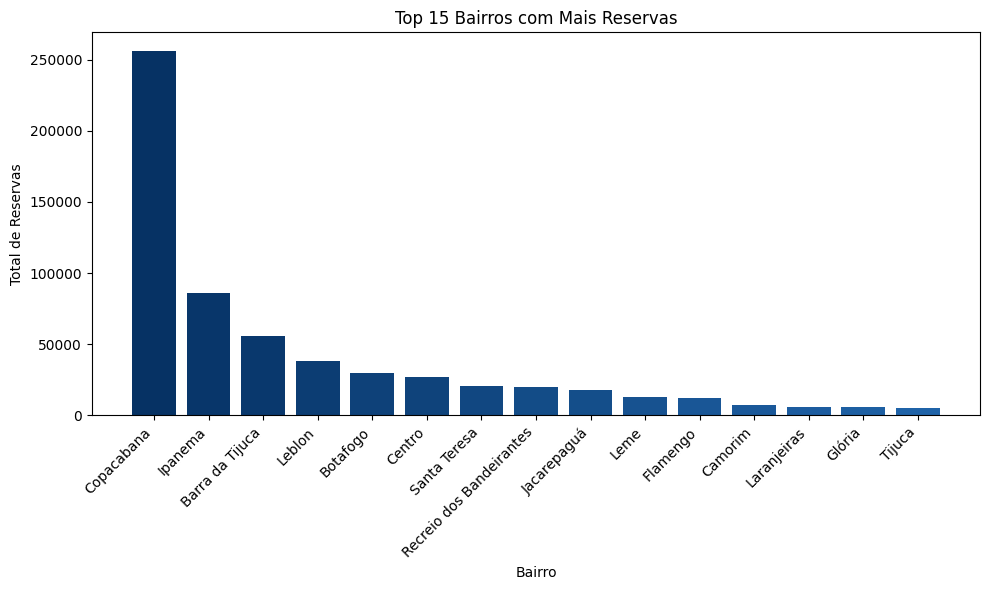

In [15]:
# Carregar os dados
airbnb_data = df

# Calcular o total de reservas por bairro
reservations_by_neighbourhood = airbnb_data.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().reset_index()

# Ordenar os bairros com base no total de reservas
reservations_by_neighbourhood = reservations_by_neighbourhood.sort_values(by='number_of_reviews', ascending=False)

# Criar um mapa de cores (gradiente) do vermelho para o azul
colors = sns.color_palette("RdBu_r", n_colors=len(reservations_by_neighbourhood))

# Plotar o gráfico de barras com o gradiente de cores
plt.figure(figsize=(10, 6))
plt.bar(reservations_by_neighbourhood['neighbourhood_cleansed'][:15], 
        reservations_by_neighbourhood['number_of_reviews'][:15], 
        color=colors)
plt.title('Top 15 Bairros com Mais Reservas')
plt.xlabel('Bairro')
plt.ylabel('Total de Reservas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribuição de Preços

O histograma apresenta a distribuição dos preços das propriedades. Os dados estão representados em uma escala linear, mostrando a frequência de ocorrência de diferentes faixas de preços.


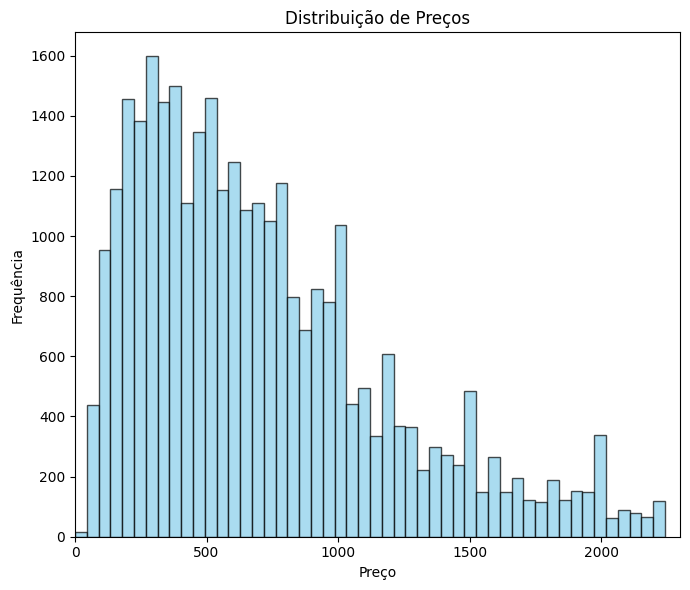

In [14]:
# Configuração do plot
fig, axes = plt.subplots(1, 1, figsize=(7, 6))

# Histograma
axes.hist(df['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes.set_title('Distribuição de Preços')
axes.set_xlabel('Preço')
axes.set_ylabel('Frequência')
axes.set_xlim(0, 2300)  # Definindo o limite do eixo x

plt.tight_layout()
plt.show()


# Quais são os tipos mais comuns de propriedades? (apartamentos, casas, etc...)

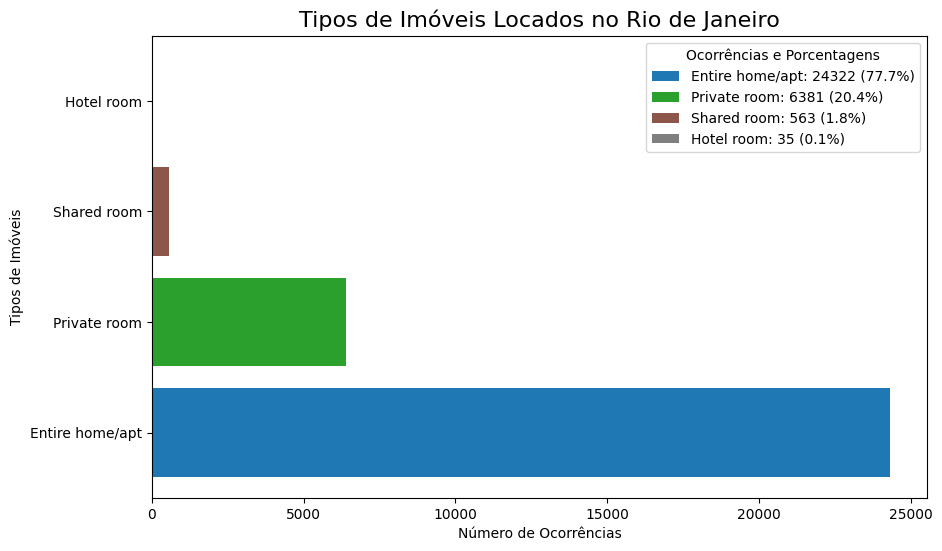

In [15]:
# Contando o número de ocorrências de cada tipo de imóvel
room_type_counts = df['room_type'].value_counts()

# Calculando as porcentagens
total = sum(room_type_counts)
percentages = [(count / total) * 100 for count in room_type_counts]

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))

# Iterando sobre cada tipo de imóvel
for i, (room_type, count) in enumerate(room_type_counts.items()):
    # Adicionando a barra com a cor correspondente
    plt.barh(room_type, count, color=plt.cm.tab10(i / len(room_type_counts)))

plt.title('Tipos de Imóveis Locados no Rio de Janeiro', fontsize=16)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipos de Imóveis')

# Criando uma legenda para representar os valores e porcentagens
legend_labels = [f'{room_type}: {count} ({percentage:.1f}%)' for room_type, count, percentage in zip(room_type_counts.index, room_type_counts, percentages)]
plt.legend(legend_labels, title='Ocorrências e Porcentagens', loc='upper right')

plt.show()


# Distribuição de preço por tipo de acomodação:

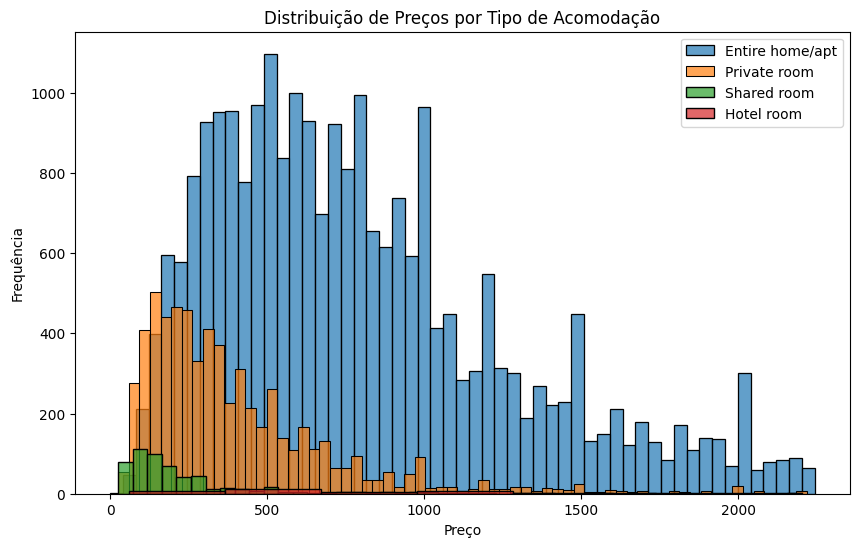

In [16]:
def plot_histogram_room_type(df):
    
    # Definir os tipos de quarto
    room_types = df['room_type'].unique()
    
    # Configurar o plot
    plt.figure(figsize=(10, 6))
    
    # Loop sobre os tipos de quarto
    for i, room_type in enumerate(room_types):
        # Selecionar os dados do tipo de quarto atual
        room_data = df[df['room_type'] == room_type]['price']
        
        # Plotar o histograma
        sns.histplot(room_data, label=room_type, alpha=0.7)
    
    # Adicionar legenda
    plt.legend()
    
    # Definir rótulos e título
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Preços por Tipo de Acomodação')
    
    # Mostrar o plot
    plt.show()

plot_histogram_room_type(df)


# Mediana de preço em relação tipo de acomodação:

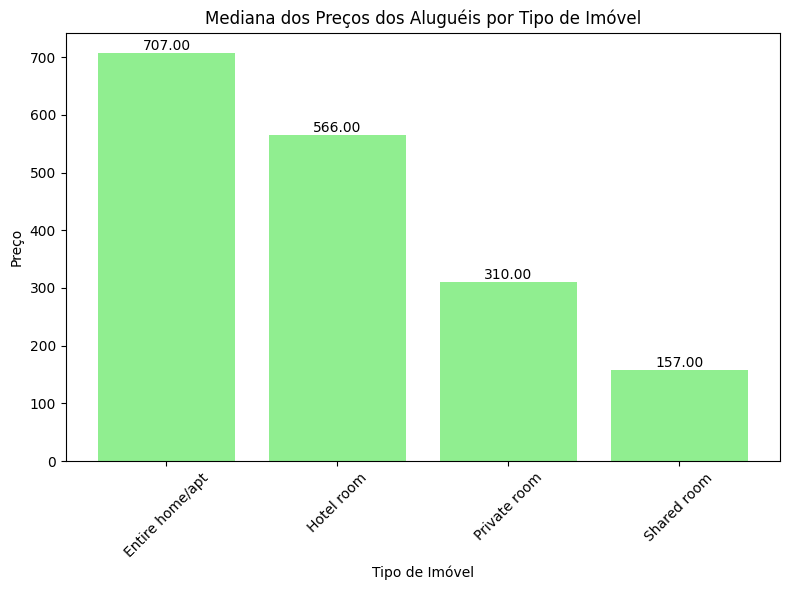

In [17]:
def plot_mediana_preco_por_tipo_imovel(df):
    # Agrupando o DataFrame por tipo de imóvel (room_type) e calculando a mediana dos preços dentro de cada grupo
    medianas_preco = df.groupby('room_type')['price'].median()

    # Criando a figura e os subplots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plotando o gráfico de barras para as medianas de preços
    ax.bar(medianas_preco.index, medianas_preco, color='lightgreen')
    ax.set_title('Mediana dos Preços dos Aluguéis por Tipo de Imóvel')
    ax.set_xlabel('Tipo de Imóvel')
    ax.set_ylabel('Preço')
    ax.tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

    # Adiciona o valor da mediana acima de cada barra
    for room_type, median_price in medianas_preco.items():
        ax.text(room_type, median_price, f'{median_price:.2f}', ha='center', va='bottom')

    # Ajustando o layout
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
plot_mediana_preco_por_tipo_imovel(df)


 # Distribuição de preço ao longo do Rio de Janeiro

In [18]:
# Calcular a média de preços por bairro
average_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Criar um mapa com o centro no Rio de Janeiro
map_airbnb = folium.Map(location=[-22.9068, -43.1729], zoom_start=11)

# Lista de cores suportadas pelo Folium
supported_colors = {'white', 'lightgreen', 'gray', 'darkblue', 'purple', 'lightgray', 'pink', 
                    'darkpurple', 'lightblue', 'red', 'black', 'darkgreen', 'lightred', 
                    'beige', 'darkred', 'green', 'orange', 'cadetblue', 'blue'}

# Definir uma função para mapear uma cor com base no preço
def price_to_color(price):
    if price < 100:
        return 'lightblue'
    elif price < 200:
        return 'blue'
    elif price < 300:
        return 'green'
    elif price < 400:
        return 'orange'
    elif price < 500:
        return 'red'
    elif price < 1000:
        return 'purple'
    elif price < 1500:
        return 'darkred'
    else:
        return 'cadetblue'  # Usar uma cor suportada pelo Folium como padrão

# Adicionar marcadores para cada bairro com a média de preço
for index, row in average_price_by_neighbourhood.iterrows():
    neighbourhood = row['neighbourhood_cleansed']
    price = row['price']
    color = price_to_color(price)
    # Verificar se a cor está na lista de cores suportadas
    icon_color = color if color in supported_colors else 'cadetblue'
    latitude = df.loc[df['neighbourhood_cleansed'] == neighbourhood, ['latitude', 'longitude']].mean().iloc[0]
    longitude = df.loc[df['neighbourhood_cleansed'] == neighbourhood, ['latitude', 'longitude']].mean().iloc[1]
    folium.Marker(location=(latitude, longitude),
                  popup=f"{neighbourhood}: R${price:.2f}/noite",
                  icon=folium.Icon(color=icon_color)).add_to(map_airbnb)

# Adicionar legenda para cada range de cor
legend_html = """
     <div style="position: fixed; 
                 top: 10px; left: 10px; width: 140px; height: 250px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; padding: 10px; padding-bottom: 20px;
                 ">
         <div style="background-color:white; height: 100%; width: 100%; overflow-y: hidden;">
              <div style="margin-bottom: 5px;">&nbsp; Preço por noite </div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:lightblue">■</span> < 100 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:blue">■</span> 100 - 200 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:green">■</span> 200 - 300 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:orange">■</span> 300 - 400 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:red">■</span> 400 - 500 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:purple">■</span> 500 - 1000 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:darkred">■</span> 1000 - 1500 R$</div>
              <div style="margin-bottom: 5px;">&nbsp; <span style="color:cadetblue">■</span> > 1500 R$</div>
         </div>
     </div>
     """
map_airbnb.get_root().html.add_child(folium.Element(legend_html))

# Visualizar o mapa
map_airbnb


# Definição visual das regiões de análise:

In [33]:
# Coordenadas centrais do mapa
center_latitude = -22.9
center_longitude = -43.2

# Criar o mapa
mapa = folium.Map(location=[center_latitude, center_longitude], zoom_start=11)

# Definir as coordenadas dos bairros da Zona Sul
bairros_zona_sul = {
    'Ipanema': (-22.984524424429143, -43.19817781336751),
    'Botafogo': (-22.951324075867237, -43.181320665789855),
    'Catete': (-22.926844252469884, -43.1793101353911),
    'Copacabana': (-22.969513882686343, -43.18713922485068),
    'Lagoa': (-22.961833496443628, -43.20325332235413),
    'Flamengo': (-22.933275370367344, -43.17408140870291),
    'Gávea': (-22.98098332074486, -43.236777400430974),
    'Humaitá': (-22.956808491023395, -43.197897760336744),
    'Jardim Botânico': (-22.96328523283786, -43.22233329774436),
    'Laranjeiras': (-22.933279759255893, -43.18507416924209),
    'Leme': (-22.961576393481486, -43.16550195347509),
    'Urca': (-22.94985710412948, -43.16210908990676),
    'Vidigal': (-22.994370374025582, -43.23811438936254),
    'Cosme Velho': (-22.940435306120843, -43.19984013010772),
    'São Conrado': (-22.99050135582423, -43.26668077635329),
    'Rocinha': (-22.988034788132143, -43.24820303197671),
    'Leblon': (-22.984392299003268, -43.2231412067984)
}

# Definir as coordenadas dos bairros da Zona Norte
bairros_zona_norte = {
    'Abolição': (-22.8866, -43.2758),
    'Acari': (-22.8227, -43.3405),
    'Água Santa': (-22.8935, -43.2958),
    'Aldeia Campista': (-22.8886, -43.2878),
    'Alto da Boa Vista': (-22.9628, -43.2515),
    'Anchieta': (-22.8168, -43.4111),
    'Andaraí': (-22.9290, -43.2432),
    'Bancários': (-22.8326, -43.1173),
    'Barros Filho': (-22.8476, -43.3912),
    'Bento Ribeiro': (-22.8729, -43.3679),
    'Bonsucesso': (-22.8643, -43.2576),
    'Brás de Pina': (-22.8469, -43.2923),
    'Cachambi': (-22.8843, -43.2816),
    'Cacuia': (-22.8012, -43.1964),
    'Campinho': (-22.8826, -43.3495),
    'Cascadura': (-22.8853, -43.3278),
    'Cavalcanti': (-22.8787, -43.3486),
    'Cidade Universitária': (-22.8552, -43.2349),
    'Cocotá': (-22.7933, -43.2046),
    'Coelho Neto': (-22.8427, -43.3743),
    'Colégio': (-22.8367, -43.3432),
    'Complexo do Alemão': (-22.8636, -43.2714),
    'Cordovil': (-22.8321, -43.2989),
    'Costa Barros': (-22.8347, -43.3852),
    'Del Castilho': (-22.8777, -43.2816),
    'Encantado': (-22.9018, -43.2812),
    'Engenheiro Leal': (-22.8715, -43.3669),
    'Engenho da Rainha': (-22.8767, -43.2869),
    'Engenho de Dentro': (-22.8871, -43.2856),
    'Engenho Novo': (-22.8939, -43.2691),
    'Freguesia': (-22.9391, -43.3307),
    'Galeão': (-22.8099, -43.2412),
    'Grajaú': (-22.9211, -43.2593),
    'Guadalupe': (-22.8257, -43.3638),
    'Higienópolis': (-22.8903, -43.2881),
    'Honório Gurgel': (-22.8478, -43.3364),
    'Inhaúma': (-22.8765, -43.2481),
    'Irajá': (-22.8271, -43.3396),
    'Jacaré': (-22.8939, -43.2421),
    'Jacarezinho': (-22.8828, -43.2477),
    'Jardim América': (-22.8417, -43.3862),
    'Jardim Carioca': (-22.8259, -43.2223),
    'Jardim Guanabara': (-22.8015, -43.1935),
    'Lins de Vasconcelos': (-22.8923, -43.2745),
    'Madureira': (-22.8822, -43.3402),
    'Mangueira': (-22.9063, -43.2474),
    'Manguinhos': (-22.8838, -43.2482),
    'Maracanã': (-22.9122, -43.2302),
    'Maré': (-22.8580, -43.2347),
    'Marechal Hermes': (-22.8763, -43.3618),
    'Maria da Graça': (-22.8826, -43.2752),
    'Méier': (-22.8938, -43.2794),
    'Moneró': (-22.8021, -43.2028),
    'Olaria': (-22.8438, -43.2727),
    'Oswaldo Cruz': (-22.8968, -43.3197),
    'Parada de Lucas': (-22.8454, -43.2843),
    'Parque Anchieta': (-22.8212, -43.3735),
    'Parque Colúmbia': (-22.8158, -43.2756),
    'Pavuna': (-22.8262, -43.3551),
    'Penha': (-22.8471, -43.2695),
    'Penha Circular': (-22.8451, -43.2655),
    'Piedade': (-22.8382, -43.2822),
    'Pilares': (-22.8809, -43.2959),
    'Pitangueiras': (-22.8312, -43.2894),
    'Portuguesa': (-22.8043, -43.1942),
    'Praça da Bandeira': (-22.9201, -43.2081),
    'Praia da Bandeira': (-22.8322, -43.2243),
    'Quintino Bocaiuva': (-22.8831, -43.3094),
    'Ramos': (-22.8494, -43.2523),
    'Riachuelo': (-22.8823, -43.2429),
    'Ribeira': (-22.8268, -43.2222),
    'Ricardo de Albuquerque': (-22.8467, -43.3934),
    'Rocha': (-22.8919, -43.2296),
    'Rocha Miranda': (-22.8476, -43.3632),
    'Sampaio': (-22.8958, -43.2384),
    'São Francisco Xavier': (-22.9107, -43.2447),
    'Tauá': (-22.8247, -43.3227),
    'Tijuca': (-22.9228, -43.2460),
    'Todos os Santos': (-22.8907, -43.2894),
    'Tomás Coelho': (-22.8701, -43.3355),
    'Turiaçu': (-22.8354, -43.3728),
    'Vaz Lobo': (-22.8664, -43.3379),
    'Vicente de Carvalho': (-22.8526, -43.3187),
    'Vila da Penha': (-22.8495, -43.3149),
    'Vigário Geral': (-22.8419, -43.3422),
    'Vila Isabel': (-22.9176, -43.2374),
    'Vila Kosmos': (-22.8594, -43.3061),
    'Vista Alegre': (-22.8284, -43.3197),
    'Zumbi': (-22.8769, -43.2299)
}

# Definir as coordenadas dos bairros da Zona Oeste
bairros_zona_oeste = {
    'Anil': (-22.9461, -43.3485),
    'Bangu': (-22.8838, -43.4679),
    'Barra da Tijuca': (-22.9998, -43.3657),
    'Barra de Guaratiba': (-23.0496, -43.5483),
    'Camorim': (-22.9649, -43.4877),
    'Campo dos Afonsos': (-22.8857, -43.3821),
    'Campo Grande': (-22.8849, -43.5619),
    'Cidade de Deus': (-22.9499, -43.3616),
    'Cosmos': (-22.9054, -43.4965),
    'Curicica': (-22.9462, -43.3886),
    'Freguesia': (-22.9391, -43.3307),
    'Gardênia Azul': (-22.9333, -43.3972),
    'Gericinó': (-22.8484, -43.4233),
    'Grumari': (-23.0482, -43.5515),
    'Guaratiba': (-23.0166, -43.5732),
    'Inhoaíba': (-22.8873, -43.5758),
    'Itanhangá': (-23.0084, -43.2977),
    'Jacarepaguá': (-22.9475, -43.3423),
    'Jardim Sulacap': (-22.8835, -43.4293),
    'Joá': (-23.0104, -43.2954),
    'Magalhães Bastos': (-22.9007, -43.4942),
    'Paciência': (-22.8979, -43.5676),
    'Padre Miguel': (-22.8766, -43.4403),
    'Pechincha': (-22.9424, -43.3548),
    'Pedra de Guaratiba': (-23.0329, -43.5515),
    'Praça Seca': (-22.9175, -43.3399),
    'Realengo': (-22.8773, -43.4423),
    'Recreio dos Bandeirantes': (-23.0325, -43.4519),
    'Santa Cruz': (-22.9236, -43.6864),
    'Santíssimo': (-22.8809, -43.4846),
    'Senador Camará': (-22.8639, -43.5292),
    'Senador Vasconcelos': (-22.9061, -43.4953),
    'Sepetiba': (-22.9396, -43.6848),
    'Tanque': (-22.8986, -43.3765),
    'Taquara': (-22.9392, -43.4035),
    'Vargem Grande': (-23.0213, -43.5486),
    'Vargem Pequena': (-23.0288, -43.4624),
    'Vila Kennedy': (-22.8519, -43.4775),
    'Vila Militar': (-22.8472, -43.3972),
    'Vila Valqueire': (-22.8785, -43.3642)
}

# Definir as coordenadas dos bairros da Região Central
bairros_regiao_central = {
    'Imperial de São Cristóvão': (-22.8968, -43.2134),
    'Benfica': (-22.9076, -43.2118),
    'Caju': (-22.8839, -43.2093),
    'Catumbi': (-22.9252, -43.2027),
    'Centro': (-22.9083, -43.1779),
    'Cidade Nova': (-22.9023, -43.2044),
    'Estácio': (-22.9141, -43.2018),
    'Gamboa': (-22.9014, -43.2034),
    'Glória': (-22.9203, -43.1743),
    'Lapa': (-22.9103, -43.1808),
    'Mangueira': (-22.9056, -43.2317),
    'Rio Comprido': (-22.9278, -43.2097),
    'Santa Teresa': (-22.9263, -43.1876),
    'Santo Cristo': (-22.8887, -43.2063),
    'Saúde': (-22.9038, -43.1886),
    'Vasco da Gama': (-22.8891, -43.2239)
}

# Extrair as coordenadas de todos os bairros
coordenadas_todas_regioes = list(bairros_zona_sul.values()) + list(bairros_zona_norte.values()) + list(bairros_zona_oeste.values()) + list(bairros_regiao_central.values())

# Calcular os limites para definir o retângulo que engloba todas as regiões
latitude_min = min(coordenada[0] for coordenada in coordenadas_todas_regioes)
latitude_max = max(coordenada[0] for coordenada in coordenadas_todas_regioes)
longitude_min = min(coordenada[1] for coordenada in coordenadas_todas_regioes)
longitude_max = max(coordenada[1] for coordenada in coordenadas_todas_regioes)

# Definir as regiões com base nos limites calculados
region_info = {
    'Zona Sul': {'latitude_min': -23.020, 'latitude_max': -22.900, 'longitude_min': -43.230, 'longitude_max': -43.130},
    'Zona Norte': {'latitude_min': -22.900, 'latitude_max': -22.800, 'longitude_min': -43.340, 'longitude_max': -43.160},
    'Zona Oeste': {'latitude_min': -23.070, 'latitude_max': -22.800, 'longitude_min': -43.540, 'longitude_max': -43.160},
    'Região Central': {'latitude_min': latitude_min, 'latitude_max': latitude_max, 'longitude_min': longitude_min, 'longitude_max': longitude_max}
}

# Cores para cada região
colors = {
    'Zona Sul': 'purple',
    'Zona Norte': 'blue',
    'Zona Oeste': 'green',
    'Região Central': 'red'
}

# Adicionar marcadores para cada bairro da Zona Sul
for bairro, coordenadas in bairros_zona_sul.items():
    folium.Marker(coordenadas, popup=bairro, icon=folium.Icon(color='purple')).add_to(mapa)

# Adicionar marcadores para cada bairro da Zona Norte
for bairro, coordenadas in bairros_zona_norte.items():
    folium.Marker(coordenadas, popup=bairro, icon=folium.Icon(color='blue')).add_to(mapa)

# Adicionar marcadores para cada bairro da Zona Oeste
for bairro, coordenadas in bairros_zona_oeste.items():
    folium.Marker(coordenadas, popup=bairro, icon=folium.Icon(color='green')).add_to(mapa)

# Adicionar marcadores para cada bairro da Região Central
for bairro, coordenadas in bairros_regiao_central.items():
    folium.Marker(coordenadas, popup=bairro, icon=folium.Icon(color='red')).add_to(mapa)

# Adicionar texto explicativo com quadrados coloridos na legenda
legenda_html = "<div style='position: relative; width: 300px; height: auto;'>"
for region, color in colors.items():
    legenda_html += f"<p style='font-size: 30px;'><span style='color: {color}; font-size: inherit;'>&#9632;</span> {region}</p>"
legenda_html += "</div>"


# Adicionar texto explicativo diretamente no mapa (canto superior direito)
folium.Marker(location=[-22.85, -43.15], icon=folium.DivIcon(html=legenda_html, icon_anchor=(0,0))).add_to(mapa)

# Exibir o mapa
mapa



# Definição das zonas do Rio de Janeiro

### Referência de bairros para cada zona tirada de: [Wikipedia](https://pt.wikipedia.org/wiki/Zona_Sul_(Rio_de_Janeiro))

Este código Python define as zonas do Rio de Janeiro com base nos bairros fornecidos e adiciona essa informação ao DataFrame, criando a coluna 'zona'.

In [19]:
# Definição das zonas
zonas = {
    'zona_sul': ['Botafogo', 'Catete', 'Copacabana', 'Cosme Velho', 'Flamengo', 'Gávea', 'Humaitá', 'Ipanema', 'Jardim Botânico', 'Lagoa', 'Laranjeiras', 'Leblon', 'Leme', 'Rocinha', 'São Conrado', 'Urca', 'Vidigal'],
    'zona_norte': ['Abolição', 'Acari', 'Água Santa', 'Aldeia Campista', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Bancários', 'Barros Filho', 'Bento Ribeiro', 'Bonsucesso', 'Brás de Pina', 'Cachambi', 'Cacuia', 'Campinho', 'Cascadura', 'Cavalcanti', 'Cidade Universitária', 'Cocotá', 'Coelho Neto', 'Colégio', 'Complexo do Alemão', 'Cordovil', 'Costa Barros', 'Del Castilho', 'Encantado', 'Engenheiro Leal', 'Engenho da Rainha', 'Engenho de Dentro', 'Engenho Novo', 'Freguesia', 'Galeão', 'Grajaú', 'Guadalupe', 'Higienópolis', 'Honório Gurgel', 'Inhaúma', 'Irajá', 'Jacaré', 'Jacarezinho', 'Jardim América', 'Jardim Carioca', 'Jardim Guanabara', 'Lins de Vasconcelos', 'Madureira', 'Manguinhos', 'Maracanã', 'Maré', 'Marechal Hermes', 'Maria da Graça', 'Méier', 'Moneró', 'Olaria', 'Oswaldo Cruz', 'Parada de Lucas', 'Parque Anchieta', 'Parque Colúmbia', 'Pavuna', 'Penha', 'Penha Circular', 'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa', 'Praça da Bandeira', 'Praia da Bandeira', 'Quintino Bocaiuva', 'Ramos', 'Riachuelo', 'Ribeira', 'Ricardo de Albuquerque', 'Rocha', 'Rocha Miranda', 'Sampaio', 'São Francisco Xavier', 'Tauá', 'Tijuca', 'Todos os Santos', 'Tomás Coelho', 'Turiaçu', 'Vaz Lobo', 'Vicente de Carvalho', 'Vila da Penha', 'Vigário Geral', 'Vila Isabel', 'Vila Kosmos', 'Vista Alegre', 'Zumbi'],
    'zona_oeste': ['Anil', 'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba', 'Camorim', 'Campo dos Afonsos', 'Campo Grande', 'Cidade de Deus', 'Cosmos', 'Curicica', 'Deodoro', 'Freguesia', 'Gardênia Azul', 'Gericinó', 'Grumari', 'Guaratiba', 'Inhoaíba', 'Itanhangá', 'Jacarepaguá', 'Jardim Sulacap', 'Joá', 'Magalhães Bastos', 'Paciência', 'Padre Miguel', 'Pechincha', 'Pedra de Guaratiba', 'Praça Seca', 'Realengo', 'Recreio dos Bandeirantes', 'Santa Cruz', 'Santíssimo', 'Senador Camará', 'Senador Vasconcelos', 'Sepetiba', 'Tanque', 'Taquara', 'Vargem Grande', 'Vargem Pequena', 'Vila Kennedy', 'Vila Militar', 'Vila Valqueire'],
    'ilhas': ['Arquipélago das Cagarras', 'Arquipélago das Tijucas', 'Ilha do Brocoió', 'Ilha das Cobras', 'Ilha de Cotunduba', 'Ilha Fiscal', 'Ilha do Frade', 'Ilha do Fundão', 'Ilha do Governador', 'Ilha da Laje', 'Ilha de Paquetá', 'Ilha da Pombeba', 'Ilha Rasa', 'Ilha de Villegagnon', 'Restinga da Marambaia'],
    'regiao_central': ['Imperial de São Cristóvão', 'Benfica', 'Caju', 'Catumbi', 'Centro', 'Cidade Nova', 'Estácio', 'Gamboa', 'Glória', 'Lapa', 'Mangueira', 'Paquetá', 'Rio Comprido', 'Santa Teresa', 'Santo Cristo', 'Saúde', 'Vasco da Gama']
}

# Função para atribuir a zona com base no bairro
def definir_zona(bairro):
    for zona, bairros in zonas.items():
        if bairro in bairros:
            return zona
    return None

# Criar a coluna 'zona' no DataFrame
df['zona'] = df['neighbourhood_cleansed'].apply(definir_zona)

# Visualizar o DataFrame
# Exibir apenas as colunas 'neighbourhood_cleansed' e 'zona'
(df[['neighbourhood_cleansed', 'zona', ]])


,neighbourhood_cleansed,zona
0,Copacabana,zona_sul
1,Copacabana,zona_sul
2,Copacabana,zona_sul
3,Copacabana,zona_sul
4,Copacabana,zona_sul
...,...,...
36003,Botafogo,zona_sul
36004,Copacabana,zona_sul
36005,Copacabana,zona_sul
36006,Vidigal,zona_sul


# 1. Calcular a mediana do preço para cada combinação de tipo de acomodação (room_type) e zona.

# 2. Plotar gráficos de barras separados para cada zona.

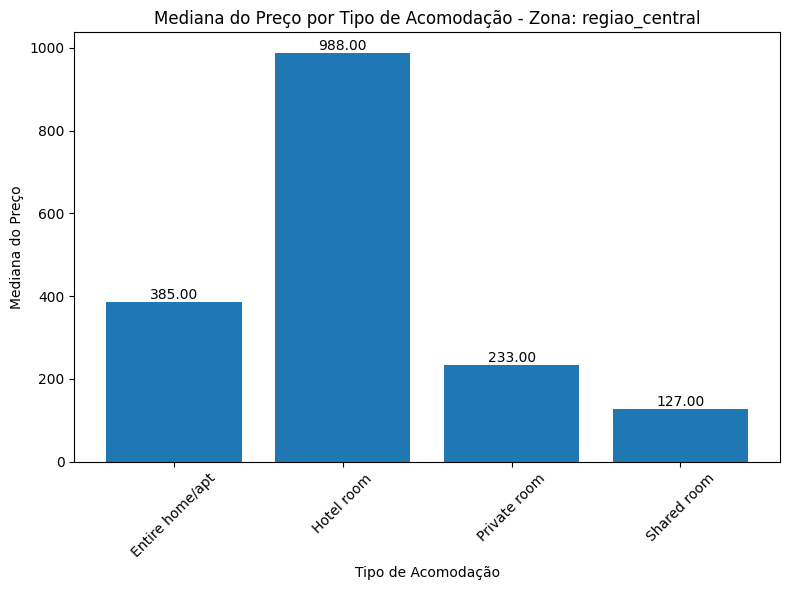

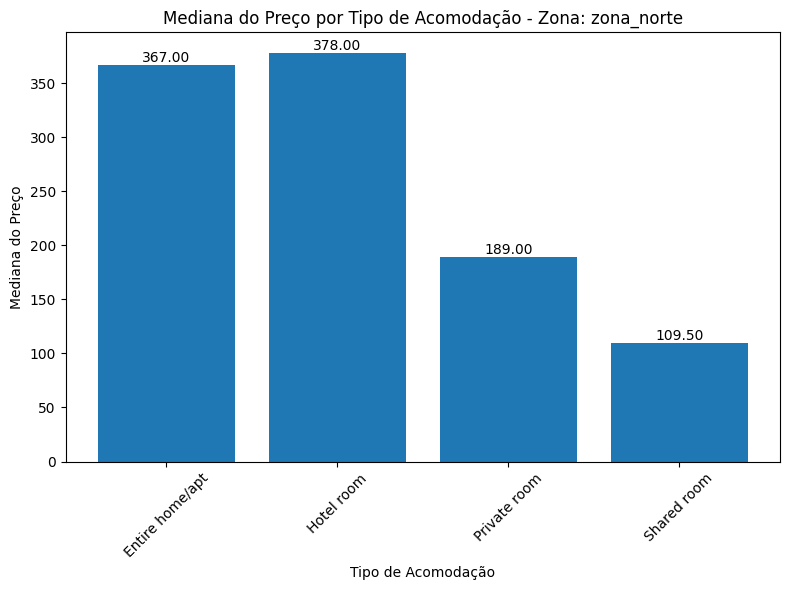

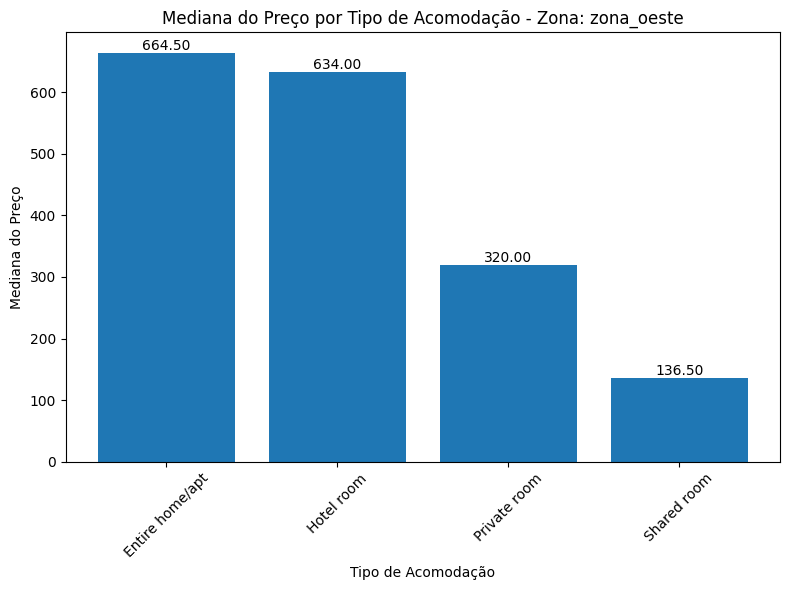

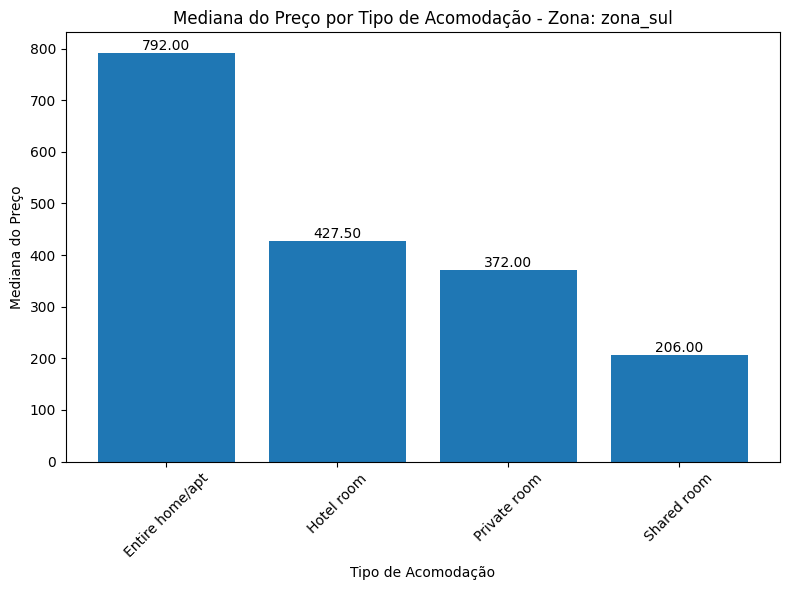

In [42]:
# 1. Calcular a mediana do preço para cada combinação de tipo de acomodação (room_type) e zona.
mediana_precos = df.groupby(['zona', 'room_type'])['price'].median().reset_index()

# 2. Plotar gráficos de barras separados para cada zona.
zonas = mediana_precos['zona'].unique()

for zona in zonas:
    plt.figure(figsize=(8, 6))
    subset = mediana_precos[mediana_precos['zona'] == zona]
    bars = plt.bar(subset['room_type'], subset['price'])
    plt.xlabel('Tipo de Acomodação')
    plt.ylabel('Mediana do Preço')
    plt.title(f'Mediana do Preço por Tipo de Acomodação - Zona: {zona}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Adicionar o preço em cima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()
